# Practical Session 2: Classification algorithms

*Notebook by Ekaterina Kochmar*

## 0.1 Your task

In practical 1, you worked with the housing prices and bike sharing datasets on the tasks that required you to predict some value (e.g., price of a house) or amount (e.g., the count of rented bikes, or the number of registered users) based on a number of attributes – age of the house, number of rooms, income level of the house owners for the house price prediction (or weather conditions and time of the day for the prediction of the number of rented bikes). That is, you were predicting some continuous value.

This time, your task is to predict a particular category the instance belongs to based on its characteristics. This type of tasks is called *classification*.

## 0.2 Dataset

First you will look into the famous [*Iris dataset*](https://en.wikipedia.org/wiki/Iris_flower_data_set), which was first introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems*. The dataset contains $4$ characteristics (sepal length and width, and petal length and width) for $3$ related species of irises – *setosa*, *versicolor* and *virginica*. Your task is to learn to predict, based on these $4$ characteristics, the type of an iris. 

For further reference, see the original paper: R. A. Fisher (1936). *The use of multiple measurements in taxonomic problems*. Annals of Eugenics. 7 (2): 179–188.

## 0.3 Learning objectives

In this practical you will learn about: 
- binary and multiclass classification
- linearly separable data
- the use of a number of classifiers, including Naive Bayes, Logistic Regression, and Perceptron
- kernel trick
- ways to evaluate the performance of a classification model, including accuracy, precision, recall and F$_1$ measure
- precision-recall trade-off and the ways to measure it, including ROC curves and AUC

In addition, you will learn about the dataset uploading routines with `sklearn`.

## Step 1: Uploading and inspecting the data

As before, let's start by uploading and looking into the data. In the previous practical, you worked with the data collected independently and stored in a comma-separated file, as the data in a real-life data science project might be. In this practical, you will learn how to use `sklearn`'s data uploading routines.

`sklearn` has a number of datasets to practice your ML skills on, and the `iris` dataset is one of them. Here is how you can access the dataset through `sklearn`. Note that such data fields as *data* and *target* are already pre-defined for you:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

Take a look into what is contained in *data*. Remember that each instance of an iris is described in terms of $4$ variables – *sepal length*, *sepal width*, *petal length*, and *petal width*:

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

To find out what variables are contained in `data`, check the `feature_names` data field.

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

What about the target values?

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

There are $3$ classes of irises – *setosa*, *versicolor*, and *virginica*, and they are already converted into numerical values for you (recall, that when the dataset is not already preprocessed this way, and the target or any of the arrtibutes are represented as text or categorical data, you need to convert them into numerical data). If you want to check what each numerical label corresponds to in the original data, you can do so accessing the `target_names` data field:

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Remember, that for further ML experiments, we need to have two data structures: the instance-by-attributes matrix $X$ and the target labels vector $y$. For instance, in the previous practical the regression algorithm learned the vector of weights $w$ to predict the target variable $\hat y^{(i)}$ for each instance $i$ so that its prediction would be maximally close to the actual label $y^{(i)}$. Since the labels $y^{(i)}$ were continuous (i.e., amount, number, or value), you measured the performance of your regressor by the distance between the predictions $\hat y$ and actual labels $y$. In this practical, you will need to work with $X$ and $y$, too, but the vector of $y$ this time will contain discrete values – classes $[0, 1, 2]$ for the different types of the flower.

As you might have already figured out, you need to initialise $X$ and $y$ with the `data` and `target` fields of your iris dataset: 

In [8]:
X, y = iris["data"], iris["target"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Let's look closer into the data to get a feel for what is contained in it. As before, let's use visualisations with `matplotlib`, and in particular, plot one attribute against another for the three types of irises using scatterplot. E.g., let's plot sepal length vs. sepal width:

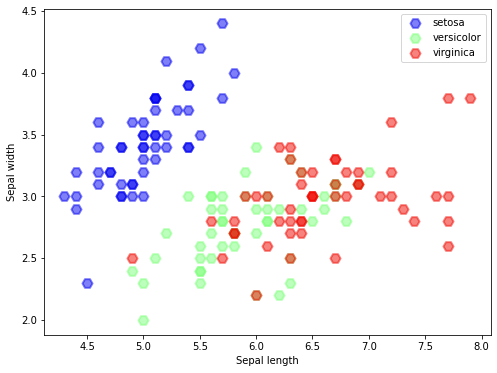

In [9]:
%matplotlib inline 
#so that the plot will be displayed in the notebook
import numpy as np
np.random.seed(42)

import matplotlib
from matplotlib import pyplot as plt

# visualise sepal length vs. sepal width
X = iris.data[:, :2]  
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)} # what is this????????????????????????????????????????????????????????????//
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=np.array([cdict[g]]), #c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)
ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()
# Are the more intensily coloured ones representing more than 1 instances???????????

It looks like *setosa* is quite clearly distiguishable from the other two types of irises with these two features. What about petal length and width?

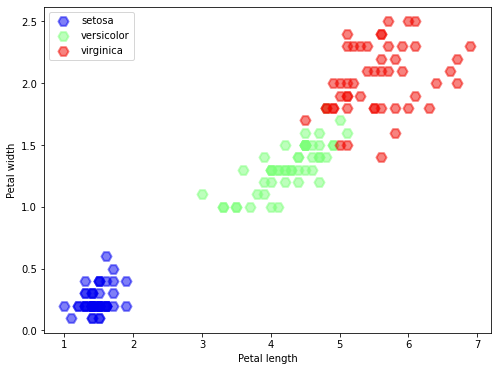

In [10]:
# visualise petal length vs. petal width
X = iris.data[:, 2:]  
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=np.array([cdict[g]]), #c = cdict[g],
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)
ax.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

This plot shows an even clearer separation between the class of *setosa* irises and the other two classes. In fact, with respect to these two attributes, it might be possible to clearly separate not only *setosas* from the other two classes, but also, with certain success, *versicolors* from *virginicas*. 

When the data can be separated by a straight line (or a single decision surface) as in the example above, it is called *linearly separable*. This property of the data is successfully exploited by ML models that try to learn a linear separation boundary between the classes. In fact, there is a whole set of lines that you can use to separate the class of *setosas* from the other two classes, *versicolors* and *virginicas*, in this example. Some linear models explicitly allow you to select the *best* separation boundary by maximising the distance between the boundary and the closest instances of the two classes. Such are, for example, [Support Vector Machines](http://scikit-learn.org/stable/modules/svm.html), which will be covered in the [Part II Machine Learning and Bayesian Inference course](https://www.cl.cam.ac.uk/teaching/2021/MLBayInfer/):

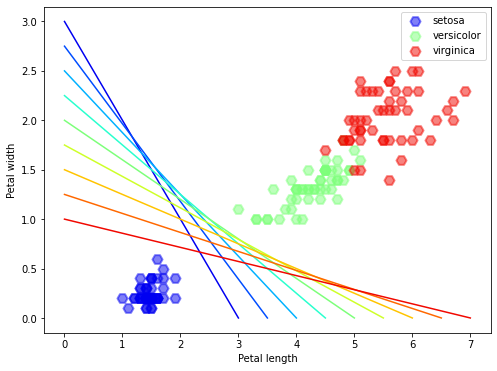

In [11]:
# visualise petal length vs. petal width
X = iris.data[:, 2:]  
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=np.array([cdict[g]]), #c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)
ax.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')

for i in range(0, 9):
    plt.plot([3 + 0.5*i, 0], [0, 3-0.25*i], 'k-', color=cmap(0.1*(i+1)))

plt.show()

For the sake of consistency, let's plot all the pairs of features against each other. Note that all plots confirm that *setosas* are linearly separable from the other two types of irises (you might notice an occasional outlier, though), while *versicolors* are linearly separable from *virginicas* with respect to some attributes only:

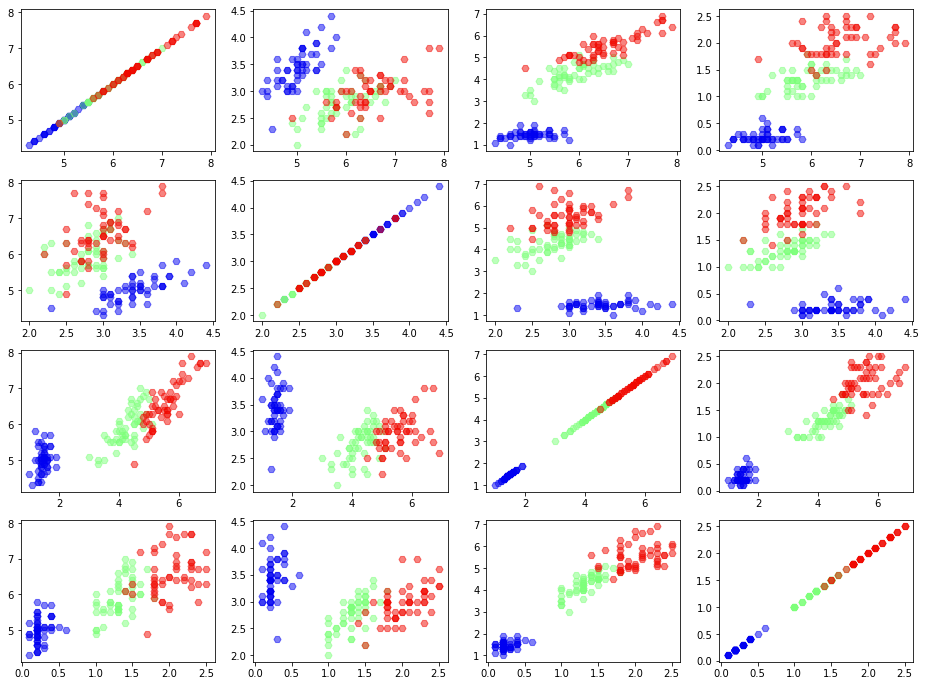

In [12]:
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

X = iris.data
y = iris.target
labels = iris.target_names
index = 1

for i in range(0, X.shape[1]):
    for j in range(0, X.shape[1]):
        scatter_x = np.array(X[:, i])
        scatter_y = np.array(X[:, j])
        group = np.array(y)
        cmap = matplotlib.cm.get_cmap('jet')
        cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
        
        ax = fig.add_subplot(X.shape[1], X.shape[1], index)
        index+=1
        
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(scatter_x[ix], scatter_y[ix], c=np.array([cdict[g]]), #c = cdict[g],
                       label = labels[g], s = 50, marker = "H", 
                       linewidth=1, alpha = 0.5)

plt.show()

## Step 2: Splitting the data into training and test subsets

Before applying the classifiers, let's split the dataset into the training and test sets. Recall, that when building an ML model, all further data exploration, feature selection and scaling, model selection and fine-tuning should be done on the training data, and the test data should only be used at the final step to evaluate the best estimated model:

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, test_size=0.2)
print(len(train_set), "training instances +", len(test_set), "test instances")

120 training instances + 30 test instances


As before, you want your training and test data to contain enough representative examples of each class, that is, you should rather apply `StratifiedShuffleSplit` and not random splitting:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)
print(split)       

for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
TRAIN: 120 TEST: 30
(120, 4) (120,) (30, 4) (30,)


Let's check the class proportions in the original dataset, and training and test subsets:

In [15]:
import pandas as pd

# def original_proportions(data):
#     props = {}
#     for value in set(data["target"]):
#         data_value = [i for i in data["target"] if i==value]
#         props[value] = len(data_value) / len(data["target"])
#     return props

def subset_proportions(subset):
    props = {}
    for value in set(subset):
        data_value = [i for i in subset if i==value]
        props[value] = len(data_value) / len(subset)
    return props

   
compare_props = pd.DataFrame({
    "Overall": subset_proportions(iris["target"]),
    "Stratified tr": subset_proportions(y_train),
    "Stratified ts": subset_proportions(y_test),
})
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

compare_props.sort_index()

,Overall,Stratified tr,Stratified ts,Strat. tr %error,Strat. ts %error
0,0.333333,0.333333,0.333333,-1.421085e-14,-1.421085e-14
1,0.333333,0.333333,0.333333,-1.421085e-14,-1.421085e-14
2,0.333333,0.333333,0.333333,-1.421085e-14,-1.421085e-14


The original dataset is well-balanced – it contains exactly $50$ examples for each class. With the stratified data splits, you get equal proportions of each type of the irises in the training and test sets, too.

Now, let's first approach the classification task in a simpler setting: let's start with *binary classification* and try to predict whether an iris is of a particular type: e.g., *setosa* vs. *not-a-setosa*, or *versicolor* vs. *not-a-versicolor*.


## Case 1: Binary classification

Let's start by separating the data that describes *setosa* from other data.

In [16]:
y_train_setosa = (y_train == 0) # will return True when the label is 0 (i.e., setosa)
y_test_setosa = (y_test == 0)
y_test_setosa

array([ True, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True])

`y_test_setosa` returns a boolean vector of $30$ test instances: it contains `True` for the test instances that are *setosas*, and `False` otherwise. Let's pick one example of a *setosa* – for instance, the first one from the test set, `X_test[0]`, for further evaluations.

In [17]:
setosa_example = X_test[0]

As you've noticed above, *setosas* are linearly separable from the other two classes, so it would be reasonable to apply a linear model to the task of separating *setosas* from *not-setosas*.

### Perceptron

A (single-layer) perceptron is a simple linear classifier that tries to learn the set of weights $w$ for the input vectors $X$ in order to predict the output binary class values $y$. In particular:

\begin{equation}
  \hat y^{(i)}=\begin{cases}
    1, & \text{if $w \cdot x^{(i)} + b > 0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

where $w \cdot x^{(i)}$ is the dot product of weight vector $w$ and the feature vector $x^{(i)}$ for the instance $i$, $\sum_{j=1}^{m} w_{j}x_{j}^{(i)}$, and $b$ is the bias term.

`sklearn` has a perceptron implementation through its linear [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) with the following parameter settings:

In [18]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None, random_state=42,
                   loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
sgd.fit(X_train, y_train_setosa)
sgd.predict([setosa_example])

array([ True])

The perceptron correctly predicts that `X_test[0]` is a *setosa* flower. However, as you've seen above, not all types of irises are linearly separable. Let's select a more challenging example of a *versicolor* (class $1$) for comparison.

In [19]:
y_train_versicolor = (y_train == 1) # True when the label is 1 (i.e., versicolor)
y_test_versicolor = (y_test == 1)
y_test_versicolor

array([False, False,  True,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False])

Select one of the examples to try your classifier on (array indexing in python starts with $0$, so you can pick indexes $2$, $3$, $5$ and so on):

In [20]:
versicolor_example = X_test[17]
print("Class", y_test[17], "(", iris.target_names[y_test[17]], ")")

sgd.fit(X_train, y_train_versicolor)
print(sgd.predict([versicolor_example]))

Class 1 ( versicolor )
[False]


Looks like perceptron indeed cannot predict the class of the *versicolor* example correctly. Let's see if another linear classifier – `Logistic Regression` – can do a better job.

### Logistic Regression

You used `Linear Regression` model in practical 1 to predict continuous values. In contrast, `Logistic Regression` is used for binary classification, that is, to predict a discrete value of $0$ or $1$. In particular, it estimates the probability that an instance belongs to a particular class (e.g., that $X\_test[0] \in {setosa}$). If the probability is greater than $50\%$, the instance is classified as *setosa* (positive class, labelled $1$ or $True$). Otherwise, it is classified as *not-a-setosa* (negative class, labelled $0$ or $False$).

Similarly to `Linear Regression`, `Logistic Regression` computes a weighted sum using the input features $w \cdot X$ plus an intercept ($w_0$), but instead of outputting the result as `Linear Regression` does, it further applies a *sigmoid function* to this result:

\begin{equation}
\hat p = \sigma (w \cdot X)
\end{equation}

The sigmoid function outputs a value between $0$ and $1$:

\begin{equation}
\sigma (t) = \frac{1}{1 + exp(-t)}
\end{equation}

Once the Logistic Regression model has estimated the probability $\hat p$, the label $\hat y$ is predicted as follows:

\begin{equation}
  \hat y=\begin{cases}
    1, & \text{if $\hat p \geq 0.5$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

Note that the above is equivalent to:

\begin{equation}
  \hat y=\begin{cases}
    1, & \text{if $t \geq 0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

Let's apply a `Logistic Regression` model to our setosa example:

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_setosa)

LogisticRegression()

In [22]:
log_reg.predict([setosa_example])

array([ True])

The model correctly predicts that the test example is indeed a setosa. What about the versicolor example?

In [23]:
log_reg.fit(X_train, y_train_versicolor)
log_reg.predict([versicolor_example])

array([ True])

Finally, for comparison, let's introduce one more classifier, that some of you might have come across before.

### Naive Bayes 

If you did [Part IA Machine Learning and Real-World Data](https://www.cl.cam.ac.uk/teaching/1920/MLRD/) in the past, you might recall that you have already come across classification tasks: for example, you were asked to build a classifier that identifies sentiment in text, and you used `Naive Bayes` for that. `Naive Bayes` makes different assumptions about the data. In particular, it doesn't assume linear separability but makes the predictions based on the prior and the updated belief about the data.

To remind you, on a two class problem (e.g., distinguishing between classes $0$ for *not-setosas* and $1$ for *setosas*), a Naive Bayes model will predict:

\begin{equation}
  \hat y^{(i)} = argmax_{c \in (0, 1)} p(y=c | x^{(i)}) = \begin{cases}
    1, & \text{if $\hat p(y=1 | x^{(i)}) > \hat p(y=0 | x^{(i)}$})\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

where the probabilities are conditioned on the feature vector for $x^{(i)}$, i.e. $(f^{(i)}_{1}, ..., f^{(i)}_{n})$. In practice, it is impossible to estimate these probabilities exactly, and one uses the Naive Bayes theorem so that:

\begin{equation}
\hat p(y=c | x^{(i)}) = \frac{p(c) p(x^{(i)} | c)}{p(x^{(i)})}
\end{equation}

where $c \in \{0, 1\}$ is the class to be predicted. Since the denominator is the same for both estimates of $\hat p(y=1 | x^{(i)})$ and $\hat p(y=0 | x^{(i)})$, it can be omitted. Therefore, the estimate can be simplified to:

\begin{equation}
\hat y^{(i)} = argmax_{c \in (0, 1)} p(y=c | x^{(i)}) = argmax_{c \in (0, 1)} p(c) p(x^{(i)} | c)
\end{equation}

where $p(c)$ is the *prior belief* of the classifier about the distribution of the classes in the data, and $p(x^{(i)} | c)$ is the *posterior probability*. Both can be estimated from the training data using *maximum a posteriori (MAP)* estimation. Moreover, the "naive" independence assumption of this learning algorithm allows you to estimate $p(x^{(i)} | c)$ as a product of feature probabilities taken independently of each other, i.e.:

\begin{equation}
p(x^{(i)} | c) = p(f^{(i)}_{1}, ..., f^{(i)}_{n} | c) \approx p(f^{(i)}_{1} | c) \times ... \times p(f^{(i)}_{n} | c)
\end{equation}

`sklearn` has a number of implementations of a [`Naive Bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html) algorithm which mainly differ from each other with respect to how they estimate the conditional probability above using the data and what believes they hold about the distribution of this data, e.g.:

In [24]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB() # or:
gnb = GaussianNB() 
gnb.fit(X_train, y_train_setosa)
gnb.predict([setosa_example])

array([ True])

In [25]:
gnb.fit(X_train, y_train_versicolor)

gnb.predict([versicolor_example])

array([ True])

As you can see, not all classifiers perform equally well. How do you measure their performance in a more comprehensive way?

## Step 3: Evaluation

### Performance measures

The most straightforward way to evaluate a classifier is to estimate how often its predictions are correct. This estimate is called *accuracy* and it is calculated as follows:

\begin{equation}
ACC = \frac{num(\hat y == y)}{num(\hat y == y) + num(\hat y != y)} = \frac{num(\hat y == 1 \& y == 1) + num(\hat y == 0 \& y == 0)}{num(\hat y == 1 \& y == 1) + num(\hat y == 0 \& y == 0) + num(\hat y == 1 \& y == 0) + num(\hat y == 0 \& y == 1)}
\end{equation}

E.g., for the *setosa* classification example, an accuracy of the classifier is the ratio of correctly identified *setosas* and correctly identified *not-setosas* to the total number of examples. 

You can either import accuracy metric using `from sklearn.metrics import accuracy_score` or measure accuracy across multiple cross-validation folds (refer to practical 1, if you need to remind yourself what cross-validation does):

In [26]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(log_reg, X_train, y_train_setosa, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train_setosa, cv=5, scoring="accuracy"))
print(cross_val_score(sgd, X_train, y_train_setosa, cv=5, scoring="accuracy"))

[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


All three classifiers are precfectly accurate in their prediction on the *setosa* example. What about the *versicolor* example?

In [27]:
print(cross_val_score(log_reg, X_train, y_train_versicolor, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train_versicolor, cv=5, scoring="accuracy"))
print(cross_val_score(sgd, X_train, y_train_versicolor, cv=5, scoring="accuracy"))

[0.75       0.70833333 0.66666667 0.75       0.70833333]
[0.875      0.95833333 1.         0.875      0.91666667]
[0.33333333 0.66666667 0.66666667 0.66666667 0.66666667]


The numbers differ but they still do not tell you much about the performance of a classifier in general. E.g., an accuracy of $\approx 0.71$ is far from perfect, but exactly how bad or how acceptable is it? 

Let's implement a brute-force algorithm that will simply predict *not-versicolor* for every instance in the *versicolor* detection case (or *not-setosa* in the *setosa* detection case). Here is how well it will perform:

In [28]:
from sklearn.base import BaseEstimator

class NotXClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
notversicolor_clf = NotXClassifier()
cross_val_score(notversicolor_clf, X_train, y_train_versicolor, cv=5, scoring="accuracy")

array([0.66666667, 0.70833333, 0.66666667, 0.70833333, 0.58333333])

This gives you a very clear benchmark for comparison. The above represents a *majority class baseline*: for each split in cross-validation splits, it measures the proportion of the majority class (*not-versicolor* in this case). That is, if the classifier does nothing and simply returns the majority class label every time, this is how "well" it will perform. Obviously, you want the actual classifier that you build to do better than that.

### Confusion matrix

So now you can compare the accuracy (e.g., the proportion of correctly identified *setosas* and *not-setosas* in the dataset) to the baseline system. However, this doesn't help you understand *where* your classifier goes wrong. For example, does the low accuracy of the classifiers in the *versicolor* identification case suggest that they miss some *versicolors* and classify them as other types of irises, or does it suggest that they mistake other types of irises for *versicolors*? Or, perhaps, it's a combination of two types of mistakes? 

The accuracy score itself doesn't allow you to make any of these conclusions. What you need to do is to look into the number of correctly and incorrectly classified instances, and the data representation that helps you do that is called *confusion matrix*. A confusion matrix is simply a table that compares the number of actual instances of type $c$ to the number of predicted instances of type $c$, i.e.:

|                  | predicted $\hat c=0$| predicted $\hat c=1$ |
|  -------------   |   :-------------:   |    :-------------:   |
| **actual $c=0$** | TN                  |   FP                 |
| **actual $c=1$** | FN                  |   TP                 |

The instances that are classified correctly as well as those that are misclassified have certain importance for evaluation of your classification algorithms. Here is the terminology:

- `TP` stands for *true positives*. These are the actual instances of class $1$ that are correctly classified as class $1$ (*setosas* identified as *setosas*);
- `TN` stands for *true negatives*. These are the actual instances of class $0$ that are correctly classified as class $0$ (*not-setosas* identified as *not-setosas*);
- `FN` stands for *false negatives*. These are the actual instances of class $1$ that are incorrectly classified as class $0$ (*setosas* identified as *not-setosas*, i.e. missed by the classifier);
- and finally, `FP` are *false positives*. These are the actual instances of class $0$ that are incorrectly classified as class $1$ (*not-setosas* identified as *setosas*, i.e. other types of flower mistaken for setosas by the classifier).

Now you can re-interpret the accuracy score as:

\begin{equation}
ACC = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

So in order to maximise accuracy, you'll need to maximise on the number of true positives and true negatives. 

The confusion matrix also tells you what exactly is misclassified by the classifier. For example, let's look into the confusion matrices for *setosa* identification:

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(log_reg, X_train, y_train_setosa, cv=5)
confusion_matrix(y_train_setosa, y_train_pred)

array([[80,  0],
       [ 0, 40]], dtype=int64)

In [30]:
y_train_pred = cross_val_predict(gnb, X_train, y_train_setosa, cv=5)
confusion_matrix(y_train_setosa, y_train_pred)

array([[80,  0],
       [ 0, 40]], dtype=int64)

You know that the accuracy of these classifiers on *setosa* identification equals to $1$, so all *setosas* ($40$ instances) and *not-setosas* ($80$ instances) are classified correctly, and the confusion matrices show exactly that. What about the mistakes that the classifiers make on the *versicolor* example?

In [31]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train_versicolor, cv=5)
confusion_matrix(y_train_versicolor, y_train_pred)

array([[71,  9],
       [25, 15]], dtype=int64)

In [32]:
y_train_pred = cross_val_predict(gnb, X_train, y_train_versicolor, cv=5)
confusion_matrix(y_train_versicolor, y_train_pred)

array([[75,  5],
       [ 4, 36]], dtype=int64)

The matrices above show that the `Logistic Regression` classifier correctly identifies $71$ *not-versicolors* (`TN`) and $15$ *versicolors* (`TP`), and it also misses $25$ *versicolors* (`FN`) and mistakes $9$ other flowers for *versicolors*. Now you can see that the bigger source of error for the `Logistic Regression` classifier is that it's not good enough in identifying *versicolors* as it misses more of them that it identifies ($25$ vs $15$). In contrast, `Naive Bayes` identifies more *versicolors* in general ($36 + 5$) and more of them correctly ($36$), while it misses only $4$ *versicolor* instances.

Apart from making such observations, you might want to be able to make sense of the number of correctly and incorrectly classified examples and compare the performance of the different classifiers in an aggregated way. The following set of measures will help you do so: *precision* ($P$), *recall* ($R$), and $F_{\beta}$*-measure* (e.g., $F_1$).

- *Precision* measures how reliable or trustworthy your classifier is. It tells you how often when the classifier predicts that a flower is a *versicolor* (class $1$) it actually is a *versicolor*. It relies on the number of $TP$'s and $FP$'s:
\begin{equation}
P = \frac{TP}{TP+FP}
\end{equation}

- *Recall* measures the coverage of your classifier. It tells you how many of the actual instances of *versicolor* your classifier can detect at all. It relies on the number of $TP$'s and $FN$'s:
\begin{equation}
R = \frac{TP}{TP+FN}
\end{equation}

- Finally, $F_1$*-score* combines the two measures above to give you an overall idea of your classifier's performance. $F_1$*-score* is estimated as follows:
\begin{equation}
F_1 = 2 \times \frac{P \times R}{P+R}
\end{equation}

It is the *harmonic mean* of the two measures. However, if you want to highlight the importance of precision in your task (and we'll talk about when you might want to do so later in this practical) or the importance of recall, you can do so by changing the $\beta$ coefficient of the *F-score*. In fact, the $F_1$*-score* is the most commonly used case of a more general $F_{\beta}$*-measure*, which is estimated as follows:
\begin{equation}
F_{\beta} = (1 + \beta^2) \times \frac{P \times R}{\beta^2 \times P+R}
\end{equation}

$\beta < 1$ puts more emphasis on precision than on recall, and $\beta > 1$ weighs recall higher than precision.

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(gnb, X_train, y_train_versicolor, cv=5)
precision = precision_score(y_train_versicolor, y_train_pred) # == 36 / (36 + 5)
recall = recall_score(y_train_versicolor, y_train_pred) # == 36 / (36 + 4)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

y_train_pred = cross_val_predict(log_reg, X_train, y_train_versicolor, cv=5)
precision = precision_score(y_train_versicolor, y_train_pred) # == 15 / (15 + 9)
recall = recall_score(y_train_versicolor, y_train_pred) # == 15 / (15 + 25)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

0.8780487804878049 0.9 0.888888888888889
0.625 0.375 0.46875


The numbers above tell you that the `Naive Bayes` classifier has pretty good recall ($0.9$, or it identifies $90\%$ of *versicolor* instances) as well as precision ($\approx 0.88$, or in approximately $88\%$ of the cases you can trust its *versicolor* prediction). The two numbers are close to each other in range, so the $F_{1}$ score is high, too. The `Logistic Regression` classifier is less precise (you can trust it about $62.5\%$ of the time) and it misses many *versicolor* examples (identifying only $37.5\%$ of those).

Obviously, if your algorithm gets it all right, you will end up with perfect accuracy, precision and recall. In practice, however, the algorithms often don't get it all perfectly correct, and depending on the task at hand, you might decide that you are actually mostly interested in high precision of your algorithm, or in high recall.

For example, imagine you are working on a machine learning classifier that detects cancerous cases in the data coming from patients' analyses. The task of your algorithm is to detect whether the patient needs further tests and closer analysis based on the preliminary tests. The cost of *false negatives* (missed cancerous cases) in this task is very high and it's better to administer further tests for a patient about which the algorithm has doubts than to ignore the case altogether. In this case, you should prioritise recall over precision.

On the other hand, imagine you work for a pharmaceutical company trying to detect whether a particular drug will be applicable to a particular condition or a particular group of patients using data science and machine learning. Or, you want to learn in a data-driven way [when to change the drug dosage for patients in a hospital](http://www.cs.cornell.edu/people/tj/publications/morik_etal_99a.pdf). In these cases, the cost of *false positives*, i.e. deciding that the drug is suitable for a particular patient when it is not, or deciding to intervene in patients' treatment when the dosage should be kept as before, is more costly. These are the cases when you should prioritise precision over recall.


### Precision-recall trade-off

Often, you can achieve perfect precision if you lower the recall, and other way around. For example, by always predicting *versicolor* you will reach perfect recall (all *versicolor* instances will be covered by such prediction), but very low precision (because in most of the cases such prediction will be unreliable as your classifier will predict *versicolor* for all setosas and all virginicas as well). On the other hand, by trying to maximise precision, you will often need to constrain your classifier so that it returns less false positives and therefore is more conservative.

A good way to understand how a classifier makes its predictions is to look into its `decision_function` – the confidence score of the classifier's predictions. For `Logistic Regression` it returns a signed distance to the separation hyperplane selected by the model. Let's check the confidence score of the `Logistic Regression` model on the *versicolor* example:

In [34]:
log_reg.fit(X_train, y_train_versicolor)

y_scores = log_reg.decision_function([versicolor_example])
y_scores

array([0.51527727])

When this confidence score is higher than the predefined model's threshold, the model assigns the instance to the positive class, and otherwise it assigns the instance to the negative class. The `Logistic Regression`'s default threshold is $0$, so the example above is classified as *versicolor*:

In [35]:
threshold = 0
y_versicolor_pred = (y_scores > threshold)
y_versicolor_pred

array([ True])

However, what would happen if you change the threshold to, for example, $0.7$? As you expect, this particular instance will be classified as *not-a-versicolor*. What effect will it have on the precision and recall of your classifier as a consequence?

In [36]:
threshold = 0.7
y_versicolor_pred = (y_scores > threshold)
y_versicolor_pred

array([False])

The following will return the confidence scores for each of the training set instances:

In [37]:
y_scores = cross_val_predict(log_reg, X_train, y_train_versicolor, cv=5, method="decision_function")
y_scores

array([-6.87063685e-01,  3.66847885e-01, -4.03787021e-02, -9.65747614e-01,
        3.36786297e-01,  1.40865169e-01,  1.10007621e-01,  1.88980949e-01,
       -7.63784085e-01, -1.59596588e+00, -1.07020726e-01, -3.67974371e-01,
        1.34388703e+00,  3.59991938e-01,  2.09532653e-01, -1.14131953e+00,
       -2.50492853e+00,  7.73381874e-01, -4.39212328e-01, -1.99957095e+00,
        5.67154901e-01, -2.30329749e+00, -1.62365949e+00, -8.63889607e-01,
        5.93952591e-01, -1.18477717e-01, -1.11462881e-01, -2.02148096e+00,
       -4.51606178e-01, -2.32088275e+00, -2.69914465e+00, -4.84783847e-01,
       -5.30495759e-01, -4.22683730e+00, -1.19176293e+00, -1.76041842e+00,
       -1.72375525e-03, -1.87426494e-01, -1.74140496e+00, -1.15501264e+00,
       -1.92389291e+00, -1.13290142e+00, -3.32787156e+00, -3.28823258e-02,
       -1.14825799e+00, -2.27905845e+00, -6.29092642e-02, -1.27116762e+00,
        5.19367774e-01, -6.57491762e-01, -8.51079964e-01, -8.08943262e-01,
       -1.53482930e+00, -

Let's use `sklearn`'s [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) functionality and plot the precision and recall values against the different threshold values. This shows you how the measures will be affected by changing the confidence threshold:

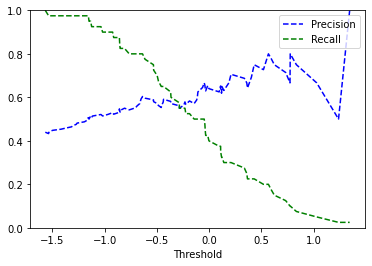

In [38]:
from sklearn.metrics import precision_recall_curve
  
precisions, recalls, thresholds = precision_recall_curve(y_train_versicolor, y_scores)

def plot_pr_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
    
plot_pr_vs_threshold(precisions, recalls, thresholds)
plt.show()

As you can see, the recall has a general tendency of decreasing when you increase the threshold – that is, the more conservative the classifier becomes, the more instances it is likely to miss. At the same time, precision curve is bumpier: with certain changes in the threshold, it might drop as well as the classifier misidentifies some other types of irises as *versicolor*.

You can also plot precision values against recall values and track the changes in precision against recall:

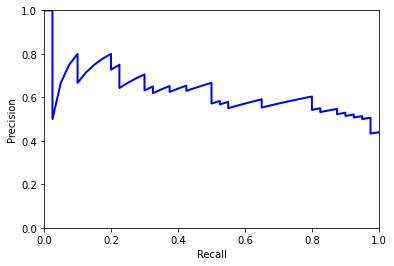

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

### The Receiver Operating Characteristic (ROC)

Another widely used way to inspect and present the results is to plot the receiver operating characteristic (ROC) curve. Similarly to the precision / recall curve above, it shows how the performance of the classifier changes at different threshold values. In particular, it plots the *true positive rate (TPR)* against the *false positive rate (FPR)*. Here is some more machine learning terminology:

- *True positive rate (TPR)* is simply another term for recall. Alternatively, it is also called *sensitivity*, or *probability of detection*;
- *False positive rate (FPR)* is also referred to as *fall-out* or *probability of false alarm*, and it can be calculated as $(1 − specificity)$. *Specificity*, in its turn, is estimated as:

\begin{equation}
specificity = \frac{TN}{TN + FP}
\end{equation}

In other words, *specificity* expresses the probability that the classifier correctly identifies *non-versicolors* in the *versicolor* identification example. *FPR*, therefore, shows how many incorrect *versicolor* votes (false alarms) the classifier makes for all *non-versicolor* examples while testing.

The ROC curve shows how the sensitivity of the classifier increases as a function of (i.e., at the expense of) the fall-out. A perfect classifier would have $100\%$ sensitivity (no false negatives) and $100\%$ specificity (no false positives), which in the ROC space can be illustrated by the point in the upper left corner with the coordinate $(0,1)$. The closer the actual ROC curve gets to this point, the better is the classifier. A random guess would give a point along a diagonal line from the left bottom to the top right corners. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).

To plot the ROC curve, let's first estimate the *FPR* and *TPR* for different threshold values using `sklearn`'s `roc_curve` functionality, and then plot *FPR* and *TPR* using `matplotlib`:

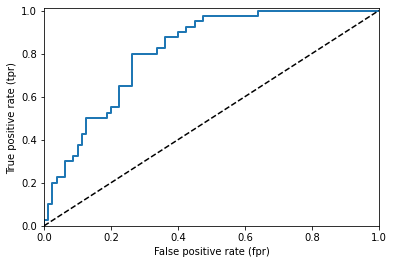

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_versicolor, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1.01])
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    
plot_roc_curve(fpr, tpr)
plt.show()

Another characteristic of the ROC curve is the *area under the curve (AUC)*, which for a perfect classifier will equal $1$ and for a random one will equal $0.5$. A estimate on a actual classifier, thus, usually lies between these two values: 

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_versicolor, y_scores)

0.8109375000000001

Now, the `Logistic Regression` classifier does not perform very well on the *versicolor* identification task, and the best classifier among the three so far is `Naive Bayes`. Let's compare its performance to the `Logistic Regression` and visualise the difference using the ROC curve. Note that `Naive Bayes` classifier implementation in `sklearn` doesn't use `decision_function`; [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba) is the equivalent of that for `Naive Bayes`:

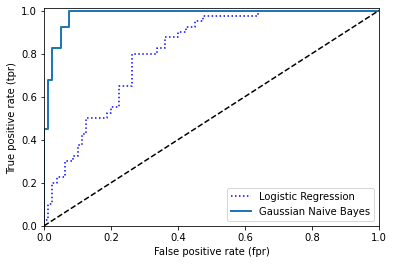

In [42]:
y_probas_gnb = cross_val_predict(gnb, X_train, y_train_versicolor, cv=3, method="predict_proba")
y_scores_gnb = y_probas_gnb[:, 1] # score = proba of the positive class
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_train_versicolor, y_scores_gnb)

plt.plot(fpr, tpr, "b:", label="Logistic Regression")
plot_roc_curve(fpr_gnb, tpr_gnb, "Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.show()

The curve for `Naive Bayes` is much closer to the upper left corner, which shows that the classifier is better than `Logistic Regression` on this task. Let's estimate the AUC as well:

In [43]:
roc_auc_score(y_train_versicolor, y_scores_gnb)

0.9828125000000001

## Step 4: Data transformations

So far, you have trained three classifiers on two classification tasks – identification of *setosas* and *versicolors*. You've seen that all three classifiers perform well on the *setosas* identification example as the data is linearly separable, and only `Naive Bayes` performs well in the *versicolors* case, because the data with the given features is not linearly separable. 

For example, consider a decision boundary that a `Logistic Regression` classifier would learn for the linearly separable class of *setosas* (based on the first two features):

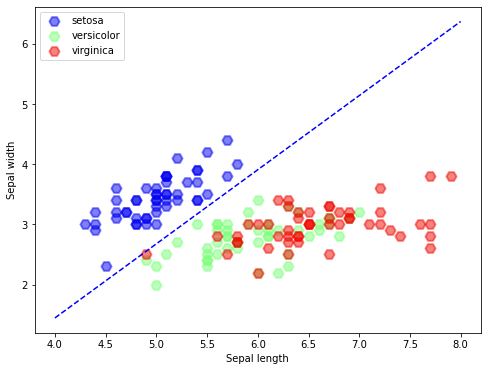

In [44]:
X = iris.data[:, :2] # consider the first two features for plotting (as in Step 1)
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=np.array([cdict[g]]), #c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)

log_reg.fit(X_train[:, :2], y_train_setosa) # train the classifier for setosas, using the first two features only
w = log_reg.coef_[0]
i = log_reg.intercept_[0]
xx = np.linspace(4, 8) # generate some values for feature1 (sepal length) in the appropriate range of values
yy = -(w[0]*xx + i)/w[1] # estimate the value for feature2 (sepal width) based on the learned weights and intercept

plt.plot(xx, yy, 'b--')    
    
ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

and compare it to the case of non-linearly separable class of *versicolors*:

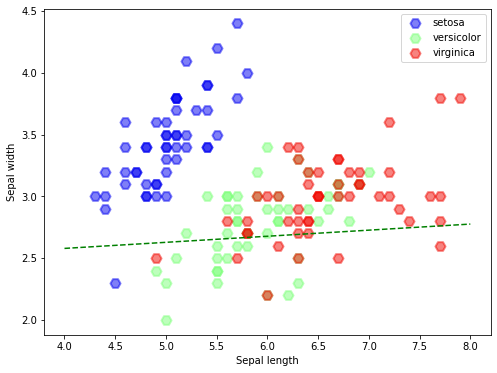

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=np.array([cdict[g]]), #c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)

log_reg.fit(X_train[:, :2], y_train_versicolor)
w = log_reg.coef_[0]
i = log_reg.intercept_[0]
xx = np.linspace(4, 8)
yy = -(w[0]*xx + i)/w[1]

plt.plot(xx, yy, 'g--')    
    
ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

The original representation of the data that you've been using so far is simply not expressive enough. But what if you could transform this data in such a way that it could be linearly separated? In fact, there is a "trick" for this problem that involves transforming the original data using a number of new dimensions in such a way that in this new high-dimensional space the classes become linearly separable. This "trick" is commonly known as the *kernel trick* or *kernel method*.

### Kernel trick  and approximate kernel maps

You will most commonly hear about this method in the context of Support Vector Machines (SVMs), for example in the [Part II Machine Learning and Bayesian Inference course](https://www.cl.cam.ac.uk/teaching/2021/MLBayInfer/). However, some other linear classifiers, including [perceptron](https://en.wikipedia.org/wiki/Kernel_perceptron), allow for the kernel methods to be used as well. 

The general motivation behind the kernel trick is as follows: when the data is not linearly separable, i.e. there is no clear dividing boundary between the two classes, the kernel trick allows you to transform the data using a number of additional dimensions that would allow for such clear dividing boundary to be learned. Kernel methods require a user-specified kernel, i.e. a function that will transform the original data into a higher dimensional space. Polynomial and Gaussian (also known as *radial-basis function*) transformations are among the most widely used kernel functions. These data transformations might remind you of the polynomial feature transformation used with the linear regression in practical 1: recall that you cast the original features from the space where the relation between the features and the output cannot exactly be captured by a linear function, into a higher dimensional feature space using  polynomial function. Recall also that this allowed you to apply a linear function to this new feature space leading to an improved result.

You will learn more about kernel functions and their application to SVMs in more detail in the Part II Machine Learning and Bayesian Inference course. For the task at hand, you will use an `sklearn`'s [approximate kernel map](http://scikit-learn.org/stable/modules/kernel_approximation.html) in combination with the perceptron implementation of the `SGDClassifier`:

In [46]:
from sklearn.kernel_approximation import RBFSampler

rbf_features = RBFSampler(gamma=1, random_state=42)
X_train_features = rbf_features.fit_transform(X_train)
print(X_train.shape, "->", X_train_features.shape)
sgd_rbf = SGDClassifier(max_iter=100, random_state=42, loss="perceptron", 
                        eta0=1, learning_rate="constant", penalty=None)
sgd_rbf.fit(X_train_features, y_train_versicolor) 

sgd_rbf.score(X_train_features, y_train_versicolor)

(120, 4) -> (120, 100)


0.9916666666666667

The output above shows that the classifier tries to learn the separation boundary in a highly-dimensional transformed feature space, and the accuracy of this learning on the training set is over $0.99$. Let's test this classifier in a 5-fold cross-validation manner, and compare precision, recall and F$_1$ scores to the linear classifier trained on the original data:

In [47]:
y_train_pred = cross_val_predict(sgd, X_train, y_train_versicolor, cv=5)
precision = precision_score(y_train_versicolor, y_train_pred)
recall = recall_score(y_train_versicolor, y_train_pred)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

y_train_pred = cross_val_predict(sgd_rbf, X_train_features, y_train_versicolor, cv=5)
precision = precision_score(y_train_versicolor, y_train_pred)
recall = recall_score(y_train_versicolor, y_train_pred)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

0.4 0.4 0.4000000000000001
0.9230769230769231 0.9 0.9113924050632911


Looks like the kernel trick helped improve the results on the originally non-linearly separable data significantly!

## Case 2:  Multi-class classification

Now remember that your actual goal is to build a three-way classifier that can predict *setosa*, *versicolor* and *virginica* classes, and not just tell whether an instance is an $X$ (*setosa* or *versicolor*) or not. Actually, you are already half way there, and here is why.

Some classifiers are capable of handling multiple classes directly. For example, `Naive Bayes` learns about the probabilities of the classes in the data irrespective of the number of classes. Therefore, the binary examples above can naturally be extended to the 3-class classification scenario: you simply provide the classifier with the data on the $3$ rather than $2$ classes. 

In contrast, such classifiers as perceptron (`SDGClassifier`) and `Logistic Regression`, which seek to learn a linear separation boundary, are inherently binary classifiers: they try to learn a single separation boundary between two classes at a time. However, they can also very easily be extended to handle more than $2$ classes. Multi-class classification with such linear classifiers generally follows one of the two routes: 

- with the *one-vs-all* (*OvA*, or *one-vs-rest*, *OvR*) strategy you train $n$ classifiers (e.g., a setosa detector, a versicolor detector and a virginica detector). For a new instance, you apply all of the classifiers and predict the class that gets the highest score returned by the classifiers;
- with the *one-vs-one* (*OvO*) strategy, you train a binary classifier for each pair of classes in your data and select the class that wins most of the duels.

There are pros and cons to each of these approaches. E.g., with the *OvO* strategy, you end up training $n \times (n-1) / 2$ classifiers. I.e. for the iris dataset you will have $3$ classifiers (exactly as with the *OvA* strategy) but on a $10$-class problem this will amount to $45$ classifiers. On the other hand, the training sets with the *OvO* will be much smaller and more balanced. Some classifiers scale poorly with the size of the training set when it is imbalanced, so *OvO* for them is preferable (e.g., such are SVMs), but most of the linear classifiers use *OvA* instead.

The nice thing about `sklearn` is that it implements the above strategies under the hood, so to perform a multi-class classification with the `SDGClassifier`, all you need to do is to provide it with the data and labels on $3$ classes, and it will train $3$ binary *OvA* classifiers and output the class with the highest score, i.e.:

In [48]:
sgd.fit(X_train, y_train) # i.e., all instances, not just one class
print(sgd.predict([setosa_example]))
print(sgd.predict([versicolor_example]))

[0]
[1]


Recall that the *versicolor* class label is $1$, so the classifier's output is correct this time. Let's also check the result with the RBF kernel:

In [49]:
sgd_rbf.fit(X_train_features, y_train) # i.e., all instances, not just one class
X_test_features = rbf_features.transform(X_test)
setosa_rbf_example = X_test_features[0] # note that you need to transform the test data in the same way, too
versicolor_rbf_example = X_test_features[17]

print(sgd_rbf.predict([setosa_rbf_example]))
print(sgd_rbf.predict([versicolor_rbf_example]))

[0]
[1]


This classifier classified both test examples correctly. Let's see what logic the classifier followed:

In [50]:
setosa_scores = sgd_rbf.decision_function([setosa_rbf_example])
print(setosa_scores)

# check which class gets the maximum score
prediction = np.argmax(setosa_scores)
print(prediction)
# check which class this corresponds to in the classifier
print(sgd_rbf.classes_[prediction])
print(iris.target_names[sgd_rbf.classes_[prediction]])

[[ 0.45557008 -0.99104538 -1.37659362]]
0
0
setosa


This shows that *setosa* class got a much higher score than the other two. What about the versicolor example?

In [51]:
versicolor_scores = sgd_rbf.decision_function([versicolor_rbf_example])
print(versicolor_scores)
prediction = np.argmax(versicolor_scores)
print(prediction)
print(iris.target_names[sgd_rbf.classes_[prediction]])

[[-1.50838342  2.76324654 -1.76976171]]
1
versicolor


For comparison, let's see what the original `SGDClassifier` (without the RBF kernel) predicted:

In [52]:
versicolor_scores = sgd.decision_function([versicolor_example])
print(versicolor_scores)
prediction = np.argmax(versicolor_scores)
print(prediction)
print(iris.target_names[sgd.classes_[prediction]])

[[-14.59   2.38 -21.34]]
1
versicolor


Now, if you'd like to use the *OvO* strategy, you can enforce the `sklearn` to do so creating an instance of a `OneVsOneClassifier` (similarly, `OneVsRestClassifier` for *OvA*). Note that you're essentially using the same classifier as before, and it is just the framework within which the predictions are made:

In [53]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=100, random_state=42, loss="perceptron", 
                                           eta0=1, learning_rate="constant", penalty=None))
ovo_clf.fit(X_train_features, y_train)
ovo_clf.predict([versicolor_rbf_example])

array([1])

In [54]:
len(ovo_clf.estimators_)

3

Now let's look into the `NaiveBayes` performance on the $3$-class problem:

In [55]:
gnb.fit(X_train, y_train)
gnb.predict([versicolor_example])

array([1])

It correctly classifies the *versicolor* example, so let's check how confident it is about this prediction (remember that you should use `predict_proba` with `NaiveBayes` and `decision_function` with the `SGDClassifier`):

In [56]:
gnb.predict_proba([versicolor_example])

array([[8.75885105e-64, 9.99994982e-01, 5.01792481e-06]])

Let's look into the cross-validated performance of the classifiers:

In [57]:
print(cross_val_score(sgd_rbf, X_train_features, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(ovo_clf, X_train_features, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy"))

[0.91666667 0.95833333 0.95833333 0.95833333 0.95833333]
[0.875      0.95833333 0.95833333 0.91666667 0.95833333]
[0.91666667 0.95833333 1.         0.95833333 0.95833333]


Finally, recall that in practical 1 you used further transformations on the data, e.g. scaling. Let's apply scaling and compare the results (note that you can use `np.mean()` to get the average accuracy score across all splits if you wish to get a single aggregated accuracy score instead of $5$ separate ones):

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_features_scaled = scaler.fit_transform(X_train_features.astype(np.float64))

print(cross_val_score(sgd_rbf, X_train_features_scaled, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(ovo_clf, X_train_features_scaled, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring="accuracy"))
# what is the diff between X_train_features_scaled and X_train_scaled ????????????????????????????????????????????


[0.91666667 1.         0.95833333 0.91666667 0.95833333]
[0.91666667 0.95833333 0.95833333 0.95833333 0.95833333]
[0.91666667 0.95833333 1.         0.95833333 0.95833333]


## Step 5: Error analysis

Before applying the classifiers to the test data, let's gain a bit more insight into what the classifiers get wrong. Recall, that earlier you used confusion matrices to learn about the classification errors:

In [59]:
y_train_pred = cross_val_predict(sgd_rbf, X_train_features_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[40,  0,  0],
       [ 0, 37,  3],
       [ 0,  4, 36]], dtype=int64)

Let's visualise the classifier decisions:

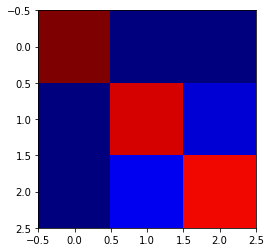

In [60]:
plt.imshow(conf_mx, cmap = "jet")
plt.show()

And if you'd like to highlight only the most salient errors, you can do so as follows (the `"jet"` color scheme uses red spectrum for higher numbers): 

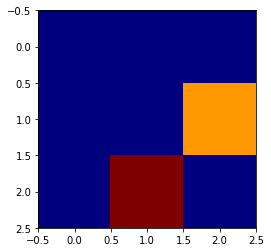

In [61]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx, cmap = "jet")
plt.show()

## Final step – evaluating on the test set

The `SGDClassifier` with the RBF kernel:

In [62]:
from sklearn.metrics import accuracy_score

X_test_features_scaled = scaler.transform(X_test_features.astype(np.float64))
y_pred = sgd_rbf.predict(X_test_features_scaled)
accuracy_score(y_test, y_pred)

0.9

In [63]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.9023569023569024 0.9 0.8997493734335841


The *OvO* SGD classifier:

In [64]:
from sklearn.metrics import accuracy_score

X_test_features_scaled = scaler.transform(X_test_features.astype(np.float64))
y_pred = ovo_clf.predict(X_test_features_scaled)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [65]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.9696969696969696 0.9666666666666667 0.9665831244778613


The `NaiveBayes` classifier:

In [66]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [67]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.9696969696969696 0.9666666666666667 0.9665831244778613


#  Assignment: Handwritten digits dataset

The dataset that you will use in this assignment is the [*digits* dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) which contains $1797$ images of $10$ hand-written digits. The digits have been preprocessed so that $32 \times 32$ bitmaps are divided into non-overlapping blocks of $4 \times 4$ and the number of on pixels are counted in each block. This generates an input matrix of $8 \times 8$ where each element is an integer in the range of $[0, ..., 16]$. This reduces dimensionality and gives invariance to small distortions.

For further information on NIST preprocessing routines applied to this data, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, *NIST Form-Based Handprint Recognition System*, NISTIR 5469, 1994.

As before, use the `sklearn`'s data uploading routines to load the dataset and get the data fields:

In [68]:
from sklearn import datasets
digits = datasets.load_digits()
list(digits.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [69]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [70]:
X, y = digits["data"], digits["target"]
X.shape

(1797, 64)

In [71]:
y.shape

(1797,)

You can access the digits and visualise them using the following code (feel free to select another digit):

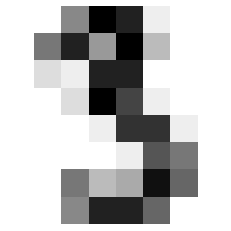

In [72]:
some_digit = X[3]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [73]:
y[3]

3

For the rest of the practical, apply the data preprocessing techniques, implement and evaluate the classification models on the digits dataset using the steps that you applied above to the iris dataset.

## Step 2: Splitting the data into training and test subsets

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)
print(split)       

for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
TRAIN: 1437 TEST: 360
(1437, 64) (1437,) (360, 64) (360,)


Check proportions

In [75]:
import pandas as pd

# def original_proportions(data):
#     props = {}
#     for value in set(data["target"]):
#         data_value = [i for i in data["target"] if i==value]
#         props[value] = len(data_value) / len(data["target"])
#     return props

def subset_proportions(subset):
    props = {}
    for value in set(subset):
        data_value = [i for i in subset if i==value]
        props[value] = len(data_value) / len(subset)
    return props

   
compare_props = pd.DataFrame({
    "Overall": subset_proportions(digits["target"]),
    "Stratified tr": subset_proportions(y_train),
    "Stratified ts": subset_proportions(y_test),
})
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

compare_props.sort_index()

,Overall,Stratified tr,Stratified ts,Strat. tr %error,Strat. ts %error
0,0.099054,0.098817,0.100000,-0.239263,0.955056
1,0.101280,0.101601,0.100000,0.316594,-1.263736
2,0.098497,0.098817,0.097222,0.324357,-1.294727
3,0.101836,0.101601,0.102778,-0.231584,0.924408
4,0.100723,0.100905,0.100000,0.179933,-0.718232
5,0.101280,0.100905,0.102778,-0.370506,1.478938
6,0.100723,0.100905,0.100000,0.179933,-0.718232
7,0.099610,0.099513,0.100000,-0.097969,0.391061
8,0.096828,0.096729,0.097222,-0.101984,0.407088
9,0.100167,0.100209,0.100000,0.041754,-0.166667


# Case 1: Binary Classification

In [76]:
y_train_zero = (y_train == 0) # will return True when the label is 0 (i.e., zero)
y_test_zero = (y_test == 0)
y_test_zero

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,

In [77]:
zero_example = X_test[10]


## Perceptron

In [78]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None, random_state=42,
                   loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
sgd.fit(X_train, y_train_zero)
sgd.predict([zero_example])

array([ True])

Trying it for label 1

In [79]:
y_train_one = (y_train == 1) # True when the label is 1 (i.e., versicolor)
y_test_one = (y_test == 1)
y_test_one

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [80]:
one_example = X_test[40]
print("Class", y_test[40], "(", digits.target_names[y_test[40]], ")")

sgd.fit(X_train, y_train_one)
print(sgd.predict([one_example]))

Class 1 ( 1 )
[ True]


Perceptron did well

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_zero)
print(log_reg.predict([zero_example]))

[ True]


In [82]:
log_reg.fit(X_train, y_train_one)
log_reg.predict([one_example])

array([ True])

Looks like Logistic regression didn't get the 1

## Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB() # or:
gnb = GaussianNB() 
gnb.fit(X_train, y_train_zero)
gnb.predict([zero_example])

array([ True])

In [84]:
gnb.fit(X_train, y_train_one)

gnb.predict([one_example])

array([ True])

Naive Bayes did good

# Step 3: Evaluation
## Performance measures
- Acc for cross-val

In [85]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(log_reg, X_train, y_train_zero, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train_zero, cv=5, scoring="accuracy"))
print(cross_val_score(sgd, X_train, y_train_zero, cv=5, scoring="accuracy"))

[1.         1.         0.99651568 1.         1.        ]
[0.98958333 0.99305556 0.99651568 1.         0.9825784 ]
[0.99652778 0.99652778 0.99651568 1.         1.        ]


In [86]:
print(cross_val_score(log_reg, X_train, y_train_one, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train_one, cv=5, scoring="accuracy"))
print(cross_val_score(sgd, X_train, y_train_one, cv=5, scoring="accuracy"))

[0.97916667 0.97916667 0.96515679 0.97212544 0.95470383]
[0.61805556 0.62847222 0.61324042 0.66550523 0.51916376]
[0.97222222 0.95486111 0.95470383 0.95470383 0.95818815]


Brute force predicting only non-ones

In [87]:
from sklearn.base import BaseEstimator

class NotXClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
notone_clf = NotXClassifier()
cross_val_score(notone_clf, X_train, y_train_one, cv=5, scoring="accuracy")

array([0.86111111, 0.89930556, 0.87804878, 0.91986063, 0.93379791])

- Confusion Matrix

In [88]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(log_reg, X_train, y_train_zero, cv=5)
confusion_matrix(y_train_zero, y_train_pred)

array([[1295,    0],
       [   1,  141]], dtype=int64)

In [89]:
y_train_pred = cross_val_predict(gnb, X_train, y_train_zero, cv=5)
confusion_matrix(y_train_zero, y_train_pred)

array([[1286,    9],
       [   2,  140]], dtype=int64)

In [90]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train_one, cv=5)
confusion_matrix(y_train_one, y_train_pred)

array([[1265,   26],
       [  17,  129]], dtype=int64)

In [91]:
y_train_pred = cross_val_predict(gnb, X_train, y_train_one, cv=5)
confusion_matrix(y_train_one, y_train_pred)

array([[731, 560],
       [  2, 144]], dtype=int64)

- precision, recall, f1

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(gnb, X_train, y_train_one, cv=5)
precision = precision_score(y_train_one, y_train_pred) # == 36 / (36 + 5)
recall = recall_score(y_train_one, y_train_pred) # == 36 / (36 + 4)
f1 = f1_score(y_train_one, y_train_pred)
print(precision, recall, f1)

y_train_pred = cross_val_predict(log_reg, X_train, y_train_one, cv=5)
precision = precision_score(y_train_one, y_train_pred) # == 15 / (15 + 9)
recall = recall_score(y_train_one, y_train_pred) # == 15 / (15 + 25)
f1 = f1_score(y_train_one, y_train_pred)
print(precision, recall, f1)

0.20454545454545456 0.9863013698630136 0.3388235294117647
0.832258064516129 0.8835616438356164 0.8571428571428571


Oh no, poor gnb

- Precision-recall treade-off

Confidence score

In [93]:
log_reg.fit(X_train, y_train_one)

y_scores = log_reg.decision_function([one_example])
y_scores

array([0.18349055])

In [94]:
threshold = 0
y_one_pred = (y_scores > threshold)
y_one_pred

array([ True])

In [95]:
threshold = -2
y_one_pred = (y_scores > threshold)
y_one_pred

array([ True])

Confidence scores

In [96]:
y_scores = cross_val_predict(log_reg, X_train, y_train_one, cv=5, method="decision_function")
y_scores

array([-20.94183926, -29.94053908, -19.2816299 , ..., -10.97030023,
       -25.62360742, -25.06389564])

Plot precision vs recall

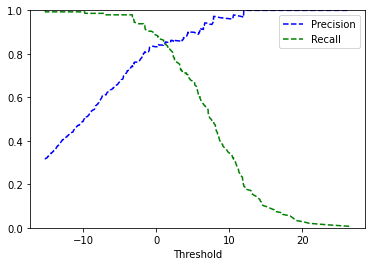

In [97]:
from sklearn.metrics import precision_recall_curve
  
precisions, recalls, thresholds = precision_recall_curve(y_train_one, y_scores)

def plot_pr_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
    
plot_pr_vs_threshold(precisions, recalls, thresholds)
plt.show()

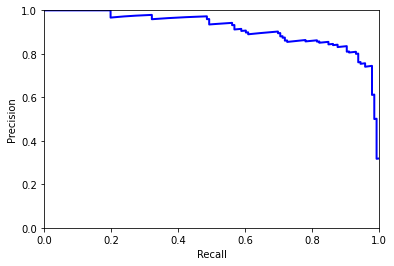

In [98]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

- The Receiver Operating Characteristic (ROC)

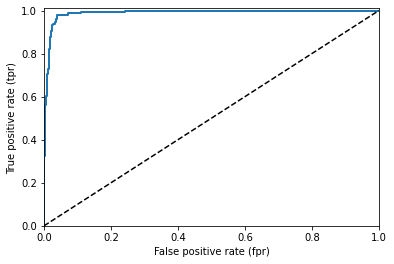

In [99]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_one, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1.01])
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    
plot_roc_curve(fpr, tpr)
plt.show()

In [100]:
# Area
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_one, y_scores)

0.9898825376951073

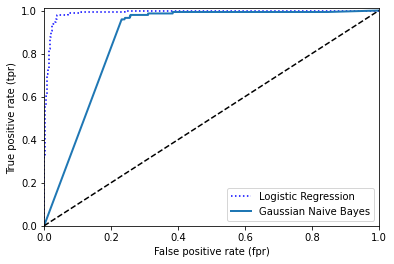

In [101]:
# Now with GNB
y_probas_gnb = cross_val_predict(gnb, X_train, y_train_one, cv=3, method="predict_proba")
y_scores_gnb = y_probas_gnb[:, 1] # score = proba of the positive class
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_train_one, y_scores_gnb)

plt.plot(fpr, tpr, "b:", label="Logistic Regression")
plot_roc_curve(fpr_gnb, tpr_gnb, "Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.show()

In [102]:
#Area
roc_auc_score(y_train_one, y_scores_gnb)

0.8727014207951784

Looks like Logistic Regression outperformed Gaussian Naive Bayes

# Step 4: Data transformations

## Kernel trick

In [103]:
from sklearn.kernel_approximation import RBFSampler

rbf_features = RBFSampler(gamma=1, random_state=42)
X_train_features = rbf_features.fit_transform(X_train)
print(X_train.shape, "->", X_train_features.shape)
sgd_rbf = SGDClassifier(max_iter=100, random_state=42, loss="perceptron", 
                        eta0=1, learning_rate="constant", penalty=None)
sgd_rbf.fit(X_train_features, y_train_one) 

sgd_rbf.score(X_train_features, y_train_one)

(1437, 64) -> (1437, 100)


0.8636047320807237

- Precision, recall and F1 : non-kernel vs kernel GNB

In [104]:
y_train_pred = cross_val_predict(sgd, X_train, y_train_one, cv=5)
precision = precision_score(y_train_one, y_train_pred)
recall = recall_score(y_train_one, y_train_pred)
f1 = f1_score(y_train_one, y_train_pred)
print(precision, recall, f1)

y_train_pred = cross_val_predict(sgd_rbf, X_train_features, y_train_one, cv=5)
precision = precision_score(y_train_one, y_train_pred)
recall = recall_score(y_train_one, y_train_pred)
f1 = f1_score(y_train_one, y_train_pred)
print(precision, recall, f1)

0.8270676691729323 0.7534246575342466 0.7885304659498208
0.11940298507462686 0.1095890410958904 0.11428571428571428


Oh no, rbf not doing so well

## Case 2: Multi-class classification

In [105]:
sgd.fit(X_train, y_train) # i.e., all instances, not just one class
print(sgd.predict([zero_example]))
print(sgd.predict([one_example]))

[0]
[1]


half good

In [106]:
sgd_rbf.fit(X_train_features, y_train) # i.e., all instances, not just one class
X_test_features = rbf_features.transform(X_test)
zero_rbf_example = X_test_features[10] # note that you need to transform the test data in the same way, too
one_rbf_example = X_test_features[3]

print(sgd_rbf.predict([zero_rbf_example]))
print(sgd_rbf.predict([one_rbf_example]))

[0]
[6]


half good

In [107]:
zero_scores = sgd_rbf.decision_function([zero_rbf_example])
print(zero_scores)

# check which class gets the maximum score
prediction = np.argmax(zero_scores)
print(prediction)
# check which class this corresponds to in the classifier
print(sgd_rbf.classes_[prediction])
print(digits.target_names[sgd_rbf.classes_[prediction]])


[[ 0.11131582 -1.71191399 -2.77783301 -3.0138792  -1.93079681 -1.18798201
  -0.70296581 -0.84500963 -2.22353921 -0.25150573]]
0
0
0


good

In [108]:
# with the kernel
one_scores = sgd_rbf.decision_function([one_rbf_example])
print(one_scores)
prediction = np.argmax(one_scores)
print(prediction)
print(digits.target_names[sgd_rbf.classes_[prediction]])

[[-1.25710377 -1.40563778 -0.42121467 -1.71982178 -1.32945855 -1.18725881
   1.44519799 -0.95860626 -1.49230544 -1.90381231]]
6
6


):

In [109]:
# without the kernel
one_scores = sgd.decision_function([one_example])
print(one_scores)
prediction = np.argmax(one_scores)
print(prediction)
print(digits.target_names[sgd.classes_[prediction]])

[[-10026.   -333.  -5977.  -2605.  -5370.  -6327.  -7540.  -2234.  -1181.
   -6917.]]
1
1


### One VS One

In [110]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=100, random_state=42, loss="perceptron", 
                                           eta0=1, learning_rate="constant", penalty=None))
ovo_clf.fit(X_train_features, y_train)
ovo_clf.predict([one_rbf_example])

array([6])

In [111]:
len(ovo_clf.estimators_)

45

10-way Naive Bayes 

In [112]:
gnb.fit(X_train, y_train)
gnb.predict([one_example])

array([1])

wow

It correctly classifies the *versicolor* example, so let's check how confident it is about this prediction (remember that you should use `predict_proba` with `NaiveBayes` and `decision_function` with the `SGDClassifier`):


In [113]:
gnb.predict_proba([one_example])

array([[0.00000000e+000, 9.99982879e-001, 8.53124651e-032,
        3.57217858e-027, 7.57911960e-026, 4.12859516e-027,
        8.21395116e-201, 2.46599746e-047, 1.71205587e-005,
        1.92613035e-041]])

Cross-validation performance

In [114]:
print(cross_val_score(sgd_rbf, X_train_features, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(ovo_clf, X_train_features, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy"))

[0.10069444 0.12847222 0.08362369 0.08013937 0.08710801]
[0.10763889 0.12152778 0.07665505 0.06968641 0.09756098]
[0.85416667 0.83333333 0.81881533 0.85365854 0.77700348]


auch

### Scaling
Let's apply scaling

In [115]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_features_scaled = scaler.fit_transform(X_train_features.astype(np.float64))

print(cross_val_score(sgd_rbf, X_train_features_scaled, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(ovo_clf, X_train_features_scaled, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring="accuracy"))

[0.07291667 0.10069444 0.05923345 0.09407666 0.11149826]
[0.08333333 0.11805556 0.10452962 0.06968641 0.09407666]
[0.79166667 0.78472222 0.76655052 0.80836237 0.72473868]


only made things worse

# Step 5: Error Analysis

In [116]:
y_train_pred = cross_val_predict(sgd_rbf, X_train_features_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 7, 17,  9, 17, 11, 12, 18, 19, 12, 20],
       [12, 14, 12, 19, 18, 13, 14, 11, 16, 17],
       [19, 20, 13,  7,  8, 11, 21, 10, 13, 20],
       [24, 17,  8, 14, 11, 13, 19, 15, 11, 14],
       [15, 14,  9, 13,  7, 16, 20, 15, 16, 20],
       [15, 18, 13, 18, 16, 14, 22,  6,  9, 14],
       [15, 21, 14, 17,  8, 12, 18, 11, 16, 13],
       [14, 13,  9, 14, 16, 14, 17, 12, 13, 21],
       [12, 21, 13,  8,  5, 15, 23, 17, 13, 12],
       [20, 17, 11, 13,  6, 18, 16, 13, 18, 12]], dtype=int64)

In [117]:
y_train_pred = cross_val_predict(sgd, X_train_features_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[11,  8, 14, 17, 11, 12, 13, 25, 17, 14],
       [18, 14, 24,  9, 15, 11, 18, 14, 16,  7],
       [12, 14, 15, 13,  5, 16, 30, 16, 12,  9],
       [19, 14, 20, 10, 11, 15, 20, 17, 12,  8],
       [18, 19, 21,  8,  9,  8, 15, 17, 16, 14],
       [13, 12, 21, 16,  7, 16, 17, 23, 12,  8],
       [16, 19, 15, 15,  7, 14, 22, 12, 13, 12],
       [23, 12, 22,  9,  7, 14, 11, 15, 18, 12],
       [14, 13, 21,  9, 12,  8, 15, 23, 12, 12],
       [14, 10, 23, 10, 10, 14, 16, 18, 17, 12]], dtype=int64)

In [119]:
y_train_pred = cross_val_predict(log_reg, X_train_features_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[10, 11, 17, 16, 17, 12, 12, 20, 11, 16],
       [20, 15, 18, 20, 16,  9, 15, 10, 18,  5],
       [16,  8, 15, 13, 14, 16, 14, 16, 11, 19],
       [20, 16,  9, 15, 15, 16, 18, 13, 18,  6],
       [21, 18,  7, 16,  5, 18, 16, 13, 10, 21],
       [13,  9, 12, 15, 14, 20, 17, 15, 11, 19],
       [11, 16, 16, 18,  6, 12, 20, 15, 17, 14],
       [18, 11, 11, 16, 18,  6, 12, 15, 15, 21],
       [18, 12, 21, 13, 10,  9,  7, 18, 14, 17],
       [15, 16, 13, 16, 12, 14, 11, 19, 20,  8]], dtype=int64)

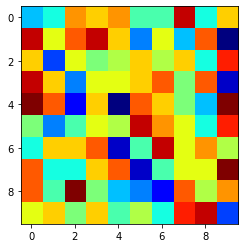

In [120]:
plt.imshow(conf_mx, cmap = "jet")
plt.show()

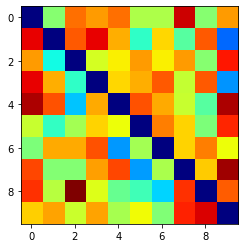

In [121]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx, cmap = "jet")
plt.show()

## Final step – evaluating on the test set

In [123]:
# kernel
from sklearn.metrics import accuracy_score

X_test_features_scaled = scaler.transform(X_test_features.astype(np.float64))
y_pred = sgd_rbf.predict(X_test_features_scaled)
accuracy_score(y_test, y_pred)

0.08888888888888889

In [124]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.08665613292644457 0.08888888888888889 0.08572982890169627


The OvO SGD classifier:

In [125]:
from sklearn.metrics import accuracy_score

X_test_features_scaled = scaler.transform(X_test_features.astype(np.float64))
y_pred = ovo_clf.predict(X_test_features_scaled)
accuracy_score(y_test, y_pred)

0.09444444444444444

In [126]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.09931635999893491 0.09444444444444444 0.09335503320695313


Naive Bayes

In [127]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.8111111111111111

In [129]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.8479871939298477 0.8111111111111111 0.8150828576150382
